In [1]:
import numpy as np
import scipy.integrate as integrate
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(rc={'text.usetex' : True}, font_scale=1.5)
sns.set_style("ticks")

In [2]:
def lame_emden(t, y, n):
    dldt = t*t * y[1]**n
    dDdt = -y[0]/(t*t) if t!=0.0 else 0.0
    return [dldt, dDdt]

def zero_density(t, y, n): 
    return y[1]
# 0 : dl/dt = t^2 D^n
# 1 : dD/dt = - l/t^2
# m = l * (4 pi alpha^3 rhoc)
# rho = rhoc * d^n
# r = alpha * t
# alpha^2 = rhoc^(1/n -1) K (1+n) / (4 pi G)
y_center = [0, 1]
n = 3
teval = np.linspace(0, 10, 100)
sol = integrate.solve_ivp(lame_emden, [0, 10], y_center, args=(n,), method="DOP853", events=zero_density, t_eval=teval)
print(sol)

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 146
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([ 0.        ,  0.1010101 ,  0.2020202 ,  0.3030303 ,  0.4040404 ,
        0.50505051,  0.60606061,  0.70707071,  0.80808081,  0.90909091,
        1.01010101,  1.11111111,  1.21212121,  1.31313131,  1.41414141,
        1.51515152,  1.61616162,  1.71717172,  1.81818182,  1.91919192,
        2.02020202,  2.12121212,  2.22222222,  2.32323232,  2.42424242,
        2.52525253,  2.62626263,  2.72727273,  2.82828283,  2.92929293,
        3.03030303,  3.13131313,  3.23232323,  3.33333333,  3.43434343,
        3.53535354,  3.63636364,  3.73737374,  3.83838384,  3.93939394,
        4.04040404,  4.14141414,  4.24242424,  4.34343434,  4.44444444,
        4.54545455,  4.64646465,  4.74747475,  4.84848485,  4.94949495,
        5.05050505,  5.15151515,  5.25252525,  5.35353535,  5.45454545,
        5.55555556,  5.656565

<ipython-input-2-58c231a96504>:2: RuntimeWarning: invalid value encountered in double_scalars
  dldt = t*t * y[1]**n


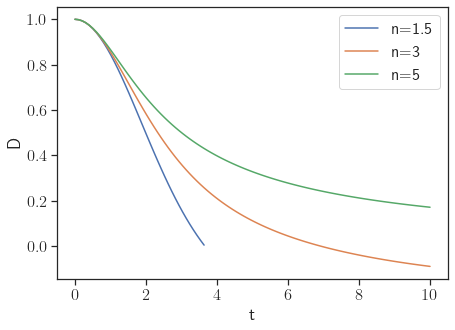

In [3]:
fig, ax = plt.subplots(1, 1, figsize=(7,5))

for n in [1.5, 3, 5]:
    y_center = [0, 1]

    teval = np.linspace(0, 10, 100)
    sol = integrate.solve_ivp(lame_emden, [0, 30], y_center, args=(n,), method="DOP853", events=zero_density, t_eval=teval)

    D = sol.y[1]
    t = sol.t

    ax.plot(t, D, label="n={:g}".format(n))
    
ax.set_xlabel("t")
ax.set_ylabel("D")
ax.legend()
plt.show()

<ipython-input-2-58c231a96504>:2: RuntimeWarning: invalid value encountered in double_scalars
  dldt = t*t * y[1]**n


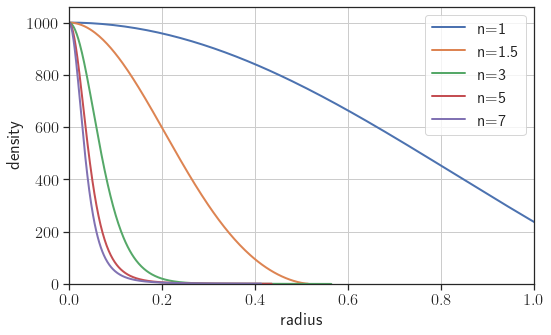

In [23]:
fig, ax = plt.subplots(1, 1, figsize=(8,5))

for n in [1, 1.5, 3, 5, 7]:
    y_center = [0, 1]

    teval = np.linspace(0, 10, 500)
    sol = integrate.solve_ivp(lame_emden, [0, 40], y_center, args=(n,), method="DOP853", events=zero_density, t_eval=teval)

    D = sol.y[1]
    t = sol.t
    
    rhoc = 1e3
    rho = rhoc * D**n
    K = 1
    G = 1
    alpha2 = rhoc**(1/n -1) * K * (1+n) / (4*np.pi*G)
    rad = t * alpha2**0.5

    ax.plot(rad, rho, label="n={:g}".format(n), lw=2)

#ax.set_yscale("log")
#ax.set_xscale("log")
ax.set_xlabel("radius")
ax.set_ylabel("density")
ax.set_xlim(0, 1)
ax.set_ylim(0)
ax.grid(True)
ax.legend()
fig.tight_layout()
fig.savefig("laneemden.pdf")
plt.show()


## Self-similar expansion tests

In [86]:
def rhor(r, k=2, rho0 = 1, r0 = 1):
    return rho0 * (r/r0)**-k

def rhoexp(r, H=0.1, rho0 = 1):
    return rho0 * np.exp(-r/H)

def rhoexpt(ft, r, H=0.1, rho0 = 1):
    return ft**3 * np.exp(-ft) * rhoexp(r, H, rho0)

def rhot(ft, r, k=2, rho0 = 1, r0 = 1):
    rhott = rhor(r, k, rho0, r0)
    rhott = rhott * ft**(3-k)
    return rhott

A0 1256.5113977297735
A0e 11.48228188983086
Aft0.9= 1256.5239641003882
Afte0.9= 4.167301658838342
Aft0.5= 1256.5742295828454
Afte0.5= 3.248513027063661
Aft0.1= 1256.6244950653033
Afte0.1= 0.5984518196926607
Aft0.01= 1256.6358047988556
Afte0.01= 5.013762644400116e-05
Aft0.001= 1256.6369357722112
Afte0.001= 3.7881192788510367e-44


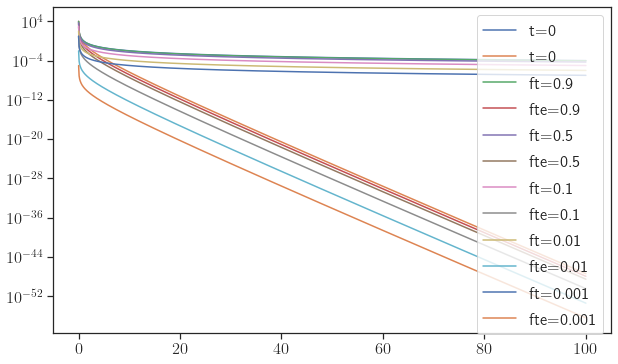

In [105]:
r = np.linspace(0.01, 100, 1000)

k=2
rho0 = rhor(r, k=k)
H, rho0norm = 1, 1e4
rho0e = rhoexp(r, H=H, rho0=rho0)

f1, ax = plt.subplots(1,1, figsize=(10,6))

ax.plot(r, rho0, label="t=0")
ax.plot(r, rho0e, label="t=0")


rcut = 100
rint =  np.linspace(0.01, rcut, 1000)
area0 = 4*np.pi*integrate.simps(rint*rint*rhor(rint, k=k), rint)
print("A0", area0)

rint =  np.linspace(0.0, rcut, 1000)
area0 = 4*np.pi*integrate.simps(rint*rint*rhoexp(rint, H=H, rho0=rho0), rint)
print("A0e", area0)


for ftval in [0.9, 0.5, 0.1, 0.01, 0.001]:
    rhotx = rhot(ftval, r, k=k)
    rhotxe = rhoexpt(ftval, r, H=H, rho0=rho0)

    
    ax.plot(r, rhotx, label="ft={:g}".format(ftval))
    ax.plot(r, rhotxe, label="fte={:g}".format(ftval))


    rrcut = rcut/ftval
    rint =  np.linspace(0.01, rrcut, 1000)
    area0 = 4*np.pi*integrate.simps(rint*rint*rhot(ftval, rint, k=k), rint)
    print("Aft{:g}=".format(ftval), area0)
    
    rint =  np.linspace(0.0, rrcut, 1000)
    area0e = 4*np.pi*integrate.simps(rint*rint*rhoexpt(ftval, rint, H=H, rho0=rho0), rint)
    print("Afte{:g}=".format(ftval), area0e)
    

#ax.set_xscale("log")
ax.set_yscale("log")
ax.legend()

plt.show()